In [2]:
import sys
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

warnings.simplefilter("ignore")

mod_path = '/Users/ishareef7/Springboard/Capstone2'
sys.path.append(mod_path)
from src.visualization import visualize
from src.features import build_dataset
from src.models import ensemble_models

In [3]:
X_train, X_test, y_train, y_test = build_dataset.get_processed_dataset()

In [4]:
X_train2, X_test2, y_train2, y_test2 = build_dataset.get_processed_dataset(crnn_predictions = False)

# Ensemble Voting Models

## Baseline Soft Voting Ensemble Model (without CRNN Predictions)

- Sub-Classifiers
    - Logistic Regression
    - SVC
    - Gradient Boosting
    
Each classifeir has equal weight

In [4]:
eclf1 = ensemble_models.baseline_model()
eclf1_fitted = ensemble_models.train_model(eclf1,'baseline')
eclf1_train_predictions, eclf1_test_predictions = ensemble_models.predict_model(eclf1_fitted, 'baseline')
eclf1_f1_scores = ensemble_models.get_f1_scores(eclf1_train_predictions, eclf1_test_predictions, 
                                model = 'baseline', f1_average = 'macro')

Training Baseline Model


In [5]:
eclf1_f1_scores

Training    0.973175
Testing     0.487579
Name: baseline, dtype: float64

In [6]:
dump(eclf1, '/Users/ishareef7/Springboard/Capstone2/models/baseline_model_fitted.joblib') 

['/Users/ishareef7/Springboard/Capstone2/models/baseline_model_fitted.joblib']

In [5]:
eclf1 = load('/Users/ishareef7/Springboard/Capstone2/models/baseline_model_fitted.joblib')

In [8]:
eclf1_f1_scores = ensemble_models.get_f1_scores(eclf1_train_predictions, eclf1_test_predictions, 
                                model = 'baseline', f1_average = None)

In [9]:
eclf1_f1_scores

,Training,Testing
International,0.976071,0.580311
Pop,0.970455,0.364532
Rock,0.966924,0.565445
Electronic,0.973568,0.584906
Folk,0.972527,0.188482
Hip-Hop,0.973510,0.737864
Experimental,0.974619,0.373832
Instrumental,0.977728,0.505263


In [6]:
clf_scores1 = [f1_score(y_test2, c.predict(X_test2) , average = 'macro') for c in eclf1.clfs_]

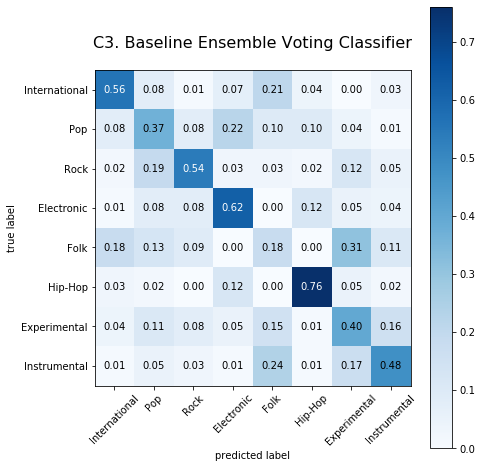

In [11]:
fig, ax = visualize.get_confusion_matrix(y_test2, eclf1_test_predictions, normalize = True,
                                title = 'C3. Baseline Ensemble Voting Classifier')

filepath = '/Users/ishareef7/Springboard/Capstone2/reports/figures/eclf1_confusion_mat.png'
fig.tight_layout()
fig.savefig(filepath)

## Stacked Soft Voting Ensemble Model (with CRNN Predictions)

- Sub-Classifiers
    - Logistic Regression
    - SVC
    - Gradient Boosting
    
Each classifeir has equal weight. Trained on a dataset that contains the predicted class probabilites from a CRNN as features.


In [12]:
eclf2 = ensemble_models.stacked_model()
eclf2_fitted = ensemble_models.train_model(eclf2,'stacked')
eclf2_train_predictions, eclf2_test_predictions = ensemble_models.predict_model(eclf2_fitted, 'stacked')
eclf2_f1_scores = ensemble_models.get_f1_scores(eclf2_train_predictions, eclf2_test_predictions, 
                                model = 'stacked', f1_average = 'macro')

Training Stacked Model


In [13]:
eclf2_f1_scores

Training    0.975536
Testing     0.505957
Name: stacked, dtype: float64

In [14]:
dump(eclf2,'/Users/ishareef7/Springboard/Capstone2/models/stacked_model_fitted.joblib')

['/Users/ishareef7/Springboard/Capstone2/models/stacked_model_fitted.joblib']

In [7]:
eclf2 = load('/Users/ishareef7/Springboard/Capstone2/models/stacked_model_fitted.joblib')

In [8]:
clf_scores2 = [f1_score(y_test, c.predict(X_test), average = 'macro') for c in eclf2.clfs_]

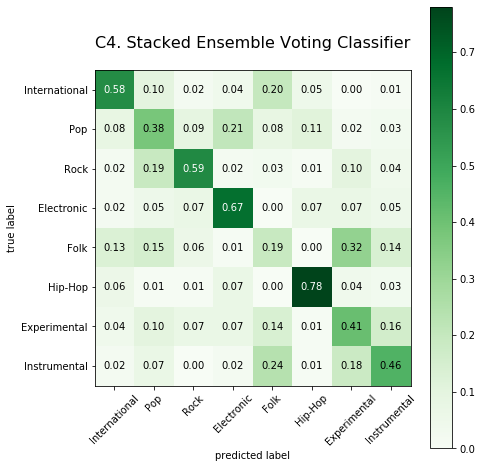

In [18]:
fig, ax = visualize.get_confusion_matrix(y_test, eclf2_test_predictions, normalize = True, 
                                title = 'C4. Stacked Ensemble Voting Classifier', cmap = 'Greens')
filepath = '/Users/ishareef7/Springboard/Capstone2/reports/figures/eclf2_confusion_mat.png'
fig.tight_layout()
fig.savefig(filepath)

In [10]:
clf_scores_df = pd.DataFrame({'BECLF': clf_scores1, 'SECLF':clf_scores2 }, index = ['Logistic Regression', 
                                                                                  'Gradient Boosting',
                                                                                 'SVC'])

In [20]:
eclf2_f1_by_genre = ensemble_models.get_f1_scores(eclf2_train_predictions, eclf2_test_predictions, 
                                model = 'stacked', f1_average = None)

In [21]:
eclf2_f1_by_genre

,Training,Testing
International,0.978321,0.594872
Pop,0.971687,0.370732
Rock,0.971366,0.617801
Electronic,0.975691,0.635071
Folk,0.974190,0.202128
Hip-Hop,0.977827,0.764706
Experimental,0.976953,0.383178
Instrumental,0.978249,0.479167


In [11]:
clf_scores_df

,BECLF,SECLF
Logistic Regression,0.444082,0.461960
Gradient Boosting,0.473772,0.493109
SVC,0.490700,0.500580
